# iLykei Lecture Series 

# Machine Learning

# Random Forest and Boosting

# Workshop

## Y.Balasanov, L.Nazarov &copy; iLykei 2017-22


Below is the list of packages used in the workshop.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import string
from numpy.random import normal,random,seed
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.metrics import log_loss
import xgboost as xgb
from xgboost.sklearn import XGBClassifier, XGBRegressor
import lightgbm as lgb

# Review of bagging, random forests and boosting    

## Bagging

Leo Breiman in Technical Report No. 421 (1994) [Bagging Predictors](https://www.cs.princeton.edu/courses/archive/fall08/cos402/readings/bagging.pdf) proposed to improve the decision trees performance by combining results of several trees built on randomly generated training subsets.     
This method was called Bagging (Bootstrap AGGregating).  

Denote

* $X$ - set of objects;
* $Y$ - either finite set of classes (classification) or set of real numbers (regression);
* $f: X\rightarrow Y$;
* $L = {(x_1,f(x_1)),..,(x_m,f(x_n))}$ - learning sample;
* $B^p = \{ L_1,...,L_p \}.$ - set of new learning samples each of size $n$, drawn from $L$ by sampling uniformly and with replacement.  

Each learning sample $L_i$ generates predictor (tree) $\widehat{f}_i$. In case of regression simple averaging gives aggregated predictor 
$$
\widehat{f}(x)=\frac{1}{p}\sum_{i=1}^{p}\widehat{f}_{i}(x).
$$
A popular method of aggregating for classification problem is majority voting. Let
$$N_{y}(x)=\sum_{i=1}^{p}I_{\left( \widehat{f}_{i}(x)=y\right) },$$
where $I_A$ is the indicator of set $A$. The formula for aggregating predictor is
$$
\widehat{f}(x)= \underset{y\in Y}{\operatorname{argmax}}N_{y}(x).
$$
This bootstrapping procedure leads to better model performance because it decreases the variance of the model, without increasing the bias.   
This means that while the predictions of a single tree are highly sensitive to noise in its training set, the average of many trees is not, as long as the trees are not correlated.     
But if one or a few features happen to be very strong predictors for the response variable, these features will be selected in many of the trees, causing them to become correlated. Random forest method can overcome this disadvantage.

## Random Forests

Random Forest is a machine learning method capable of performing both regression and classification tasks.    

It also can be used as dimensionality reduction method.    

The [*sklearn.ensemble*](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) module includes two averaging algorithms based on randomized decision trees: the RandomForest algorithm and the Extra-Trees method. Both algorithms are perturb-and-combine techniques ([see here](https://www.stat.berkeley.edu/~breiman/arcall.pdf)) specifically designed for trees. This means a diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers.  

Random forests provide an improvement over bagged trees by decorrelating trees when the impose constraints on predictors.   
     
As in bagging, a number of decision trees is built on bootstrapped learning samples.     
But when building these decision trees, each time a split in a tree is considered, a random sample of $m$ predictors is chosen as split candidates from the full set of $M$ predictors.    
The split is allowed to use only one of those $m$ predictors.     
Here is more detailed description of the algorithm.

1. Assume that  the size of the learning set $L$ is $n$ as above.    
Then, bootstrapped sample is generated from $L$ by sampling uniformly and with replacement.    
This sample will be the training set for the tree.
2. If there are $M$ input variables, a number $m<M$ is specified such that at each node, $m$ variables are selected randomly out of $M$.    
The best split on these $m$ is used to split the node.     
The value of $m$ is held constant through the process of growing the forest.      
3. Algorithm builds $N_{tree}$ trees. Each of them is grown to the largest extent possible and  there is no pruning.    
4. Predict new data by aggregating the predictions of the $N_{tree}$ trees (i.e., majority votes for classification, average for regression).

The value of $m$ is taken small compare to $M$. The inventors make the following recommendations:     

* For classification, the default value for $m$ is $\sqrt{M}$  and the minimum node size is one.  
*  For regression, the default value for $m$ is $M/3$ and the minimum
node size is five.  

In practice the best values for these parameters will depend on the problem, and they should be treated as tuning parameters.

Random forest can handle large data set with higher dimensionality. It can handle thousands of input variables and identify most significant variables so it is considered as one of the dimensionality reduction methods. Further, the model outputs Importance of variable, which can be a very handy feature.  

It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing. It has methods for balancing errors in data sets where classes are imbalanced.  

Random Forest involves sampling of the input data with replacement.  Here around one third of the data are not used for training and can be used for testing.     
These observations are called out-of-bag (OOB) samples.    
Errors estimated on these OOB samples are known as OOB errors. The resulting OOB errors are valid estimates of the test error for the bagged model, since the response for each observation is predicted using only the trees that were not fit using that observation.    
An OOB error estimate is close to that obtained by 3-fold crossvalidation. Hence unlike many other nonlinear estimators, random forests can be fit in one sequence, with cross-validation being performed along the way.

Random Forest is better at classification but not as good for regression problems since it does not give continuous output.  

It looks like a black box approach to statistical modelers - you have very little control on what the model does.    
You can at best - try different parameters and random seeds.

## Boosting

The term "Boosting" refers to a family of algorithms which converts group of weak learners to a strong learner(s).    
Boosting was originally designed for classification problems, but it was later extended to regression.     
Like bagging, boosting is a general approach that can be applied to many statistical learning methods for regression or classification.    

### Gradient boosting trees 

Cheng Li presentation [A Gentle Introduction to Gradient Boosting](http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf) is partially used in this section.  

In each step of Boosting procedure the tree is fitted to the residuals $r_x = f(x) -\widehat{f}(x)$ of the previous step.    
One may note that residual is the negative derivative of the square loss function: 
$$
\frac{\partial }{\partial \widehat{f}(x)}L\left( f(x),\widehat{f}(x)\right)
$$
where $L(u,v)=\frac{1}{2}(u-v)^{2}$ is the loss function.    
So,  boosting can be considered as a gradient descent algorithm.  

A generic gradient boosting method for smooth loss function $L$ is described by [Friedman, J. H. Greedy Function Approximation: A Gradient Boosting Machine.](http://statweb.stanford.edu/~jhf/ftp/trebst.pdf)     

# Simple Example with Clustering

Consider a simple example in which a sine wave signal covered by some noise is analyzed with gradient boosting method.    

Simulate the data.

In [2]:
seed(0)
x = np.arange(0, 2*np.pi, .01)
sigmaEps = .1
eps = normal(0,sigmaEps,len(x))
signal = np.sin(x) + eps
# use DataFrame.from_items to preserve column order
data = pd.DataFrame({'x': x, 'signal': signal})
data.head()

,x,signal
0,0.00,0.176405
1,0.01,0.050016
2,0.02,0.117872
3,0.03,0.254085
4,0.04,0.226745


Create a function which makes a plot of the first and the last columns of a data frame.

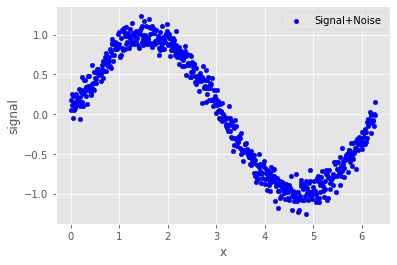

In [3]:
def myPlot(myDF):
    ax = myDF.plot(x='x',y='signal',kind='scatter',color="blue")
    legend = ['Signal+Noise']
    if myDF.shape[1]>2:
        legend += [list(myDF)[-1]]
        myDF.plot(ax=ax,x='x',y= legend[1],kind='scatter',marker='o',color='red')
    ax.legend(legend,bbox_to_anchor=(1, 1))
    plt.show()

myPlot(data)

As a simple learner use cluster analysis into 2 clusters.

In [4]:
from sklearn.mixture import GaussianMixture
X = data[['signal']]
gmm = GaussianMixture(n_components=2).fit(X)

Explore the returned object.

Gaussian finite mixture model fitted by EM algorithm
{'aic': 1165.1495766247758, 'bic': 1187.370232908278, 'average log-likelihood': -0.9182429066969601}
Clustering table:
0    315
1    314
dtype: int64
model means [-0.64663154  0.62984569]
model variances [0.1065756  0.11174951]


0    1
1    1
2    1
3    1
4    1
dtype: int64

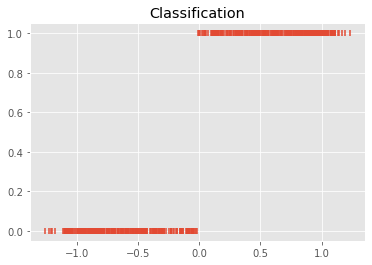

In [5]:
print('Gaussian finite mixture model fitted by EM algorithm')
print({'aic':gmm.aic(X),'bic':gmm.bic(X),'average log-likelihood':gmm.score(X)})
print('Clustering table:')
model_classification = pd.Series(gmm.predict(X))
print(model_classification.value_counts())
plt.scatter(data.signal,model_classification,marker='|')
plt.title('Classification')
means = gmm.means_.flatten()
print('model means',means)
print('model variances',gmm.covariances_.flatten())
model_classification.head()

Clustering identified two groups with positive and negative mean values and similar standard deviations.   

Create the first learner fitted values and add the column of them to the data frame.    
Plot it.

      x    signal  learner1
0  0.00  0.176405  0.629846
1  0.01  0.050016  0.629846
2  0.02  0.117872  0.629846
3  0.03  0.254085  0.629846
4  0.04  0.226745  0.629846


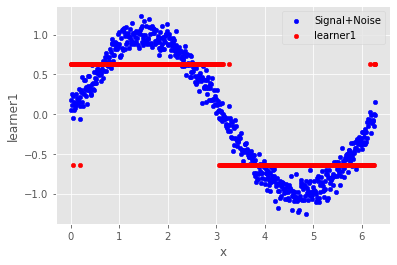

In [6]:
data['learner1'] = means[model_classification]
print(data.head())
myPlot(data)

The plot shows the original signal plus noise data (blue) and the prediction by the first learner (red).    

Obviously, the learner is too simplistic to capture the nonlinear pattern of the signal, but it does separate the positive and the negative clusters of points.    

Extract residuals after the first learner.

0.7186892173210622 0.31536790166282513


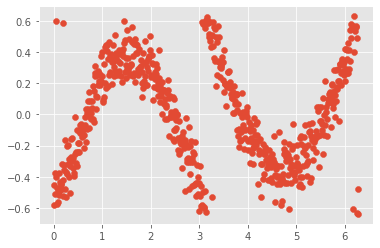

In [7]:
residuals1 = data.signal - data.learner1
plt.scatter(data.x,residuals1)
sd1 = np.std(residuals1)
print(np.std(data.signal),sd1)

There is a remaining pattern in the residuals, but we observe a significant reduction in standard deviation relative to the original data.   
In order to repeat the steps of gradient boosting several more times create a function `simpleLearner(mySignal)` which takes a signal vector (pandas Series or numpy array with shape = (n,1)) and splits it into 2 groups using `GaussianMixture`, returning vector of the next learner predicted values.    

<span style="color:red">(Skipped Code)</span>

In [8]:
def simpleLearner(mySignal):
    if mySignal.ndim==1: mySignal = mySignal.values.reshape(-1,1)
    gmm = GaussianMixture(n_components=2).fit(mySignal)
    return gmm.means_.flatten()[gmm.predict(mySignal)]

Create the second learner vector of fitted values as the sum of learner 1 column and the learner 2 column created by applying `Mclust()` to the residuals after the first iteration.

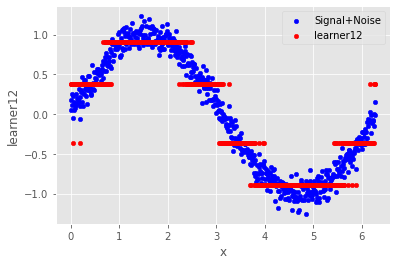

In [9]:
data['learner12'] = data.learner1 + simpleLearner(residuals1)
myPlot(data)

The combination of the two simple learners creates a pattern with 4 levels which captures the signal much better.    

Create new residuals and repeat the iteration step one more time.

0.7186892173210622 0.15847951028219512


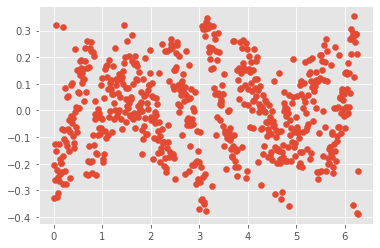

In [10]:
residuals2 = data.signal - data.learner12
plt.scatter(data.x,residuals2)
sd2 = np.std(residuals2)
print(np.std(data.signal),sd2)

This step again significantly reduced standard deviation of the residuals.   

Create new learner combining 3 iterations.

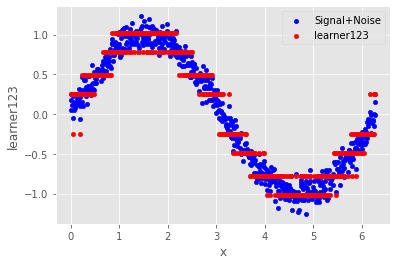

In [11]:
data['learner123'] = data.learner12 + simpleLearner(residuals2)
myPlot(data)

At 8 levels the signal is captured better.    

Make another iteration.

0.7186892173210622 0.09001522277344566


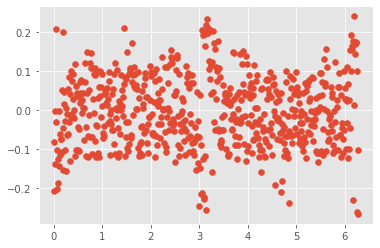

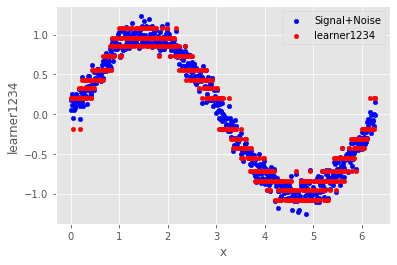

0.7186892173210622 0.09001522277344566


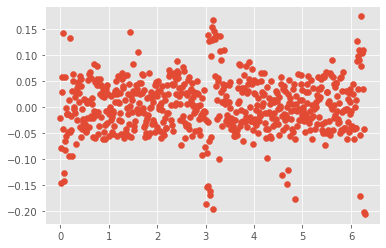

In [12]:
residuals3 = data.signal - data.learner123
plt.scatter(data.x,residuals3)
sd3 = np.std(residuals3)
print(np.std(data.signal),sd3)

data['learner1234'] = data.learner123 + simpleLearner(residuals3)
myPlot(data)

residuals4 = data.signal - data.learner1234
plt.scatter(data.x,residuals4)
sd4 = np.std(residuals4)
print(np.std(data.signal),sd3)

Finally, try one more time.

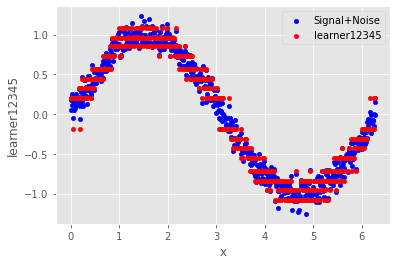

In [13]:
data['learner12345'] = data.learner1234 + simpleLearner(residuals4)
myPlot(data)

Combination of several very simple learners achieved very accurate description of complex nonlinear pattern of the original signal.

0.7186892173210622 0.31536790166282513 0.15847951028219512 0.09001522277344566 0.052879442289797685 0.052851961412370675


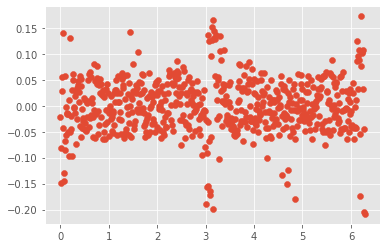

In [14]:
residuals5 = data.signal - data.learner12345
plt.scatter(data.x,residuals5)
sd5 = np.std(residuals5)
print(np.std(data.signal),sd1,sd2,sd3,sd4,sd5)

Almost no improvement of the standard deviation of the residuals on the last step, stop the process.   

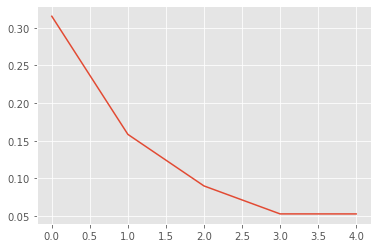

In [15]:
plt.plot([sd1,sd2,sd3,sd4,sd5])

Note that the standard deviation of the remaining noise is lower than the standard deviation of the originally simulated noise $\epsilon_i$.   

# Regression

## Example: Predicting Baseball Players' Salaries

Use the Hitters data from the ISLR library for a simple example

In [16]:
URL = 'https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Hitters.csv'

Remove missing entries and take logs

In [17]:
# Read and remove incomplete cases 
Hitters = pd.read_csv(URL,index_col=0).dropna()
# log transform Salary to make it a bit more normally distributed
Hitters['Salary'] = np.log(Hitters.Salary)
Hitters.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,6.163315,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,6.173786,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,6.214608,N


### Random Forest    

Random forest [regression](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor) is implemented in the [*sklearn.ensemble*](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) module.     

A random forest is a meta estimator that fits a number of decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if *bootstrap=True* (default).  

This implementation does not work with categorical features. Replace them with integer ones using class [*sklearn.preprocessing.LabelEncoder*](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [18]:
le = LabelEncoder()
for col_name,col_type in zip(list(Hitters),Hitters.dtypes):
    if col_type=='object':
        print('encode column',col_name)
        Hitters[col_name] = le.fit_transform(Hitters[col_name])   
Hitters.head(3)

encode column League
encode column Division
encode column NewLeague


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,6.163315,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,6.173786,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,6.214608,1


#### Default arguments    

Set seed for reproducibility and grow a forest.

In [19]:
# oob_score: whether to use out-of-bag samples to estimate the R^2 on unseen data 
# n_jobs=-1: the number of jobs is set to the number of cores
rfSalary = RandomForestRegressor(n_estimators=500,random_state=0,oob_score=True,
                                 n_jobs=-1)
X, y = Hitters.drop('Salary',axis=1),Hitters.Salary
rfSalary.fit(X, y)
print('coefficient of determination R^2 =',rfSalary.oob_score_)

coefficient of determination R^2 = 0.7566665474380092


The *RandomForestRegressor* class instance has attribute  
*feature\_importances\_ : array of shape = (n_features,)*.  
The higher feature importance, the more important is the feature.

In [20]:
print(rfSalary.feature_importances_)

[0.03903902 0.04079388 0.01075775 0.01940073 0.0297997  0.03661082
 0.01134005 0.38252384 0.11877567 0.02203308 0.16707112 0.04775688
 0.03201404 0.00122329 0.0015731  0.01956265 0.00830709 0.0090688
 0.00234849]


We can also sort variables according to its importances and plot them

<AxesSubplot:>

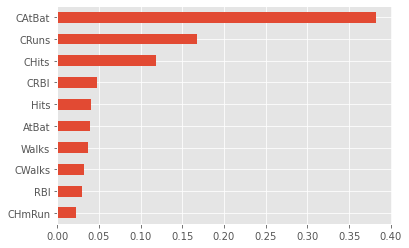

In [21]:
imp = pd.Series(rfSalary.feature_importances_, index=list(X)).sort_values()
imp[-10:].plot(kind = 'barh')

#### Reduced number of trees
Compare forests with 500 and 200 trees:

In [22]:
rfSalary200 = RandomForestRegressor(n_estimators=200,random_state=0,oob_score=True,
                                 n_jobs=-1)
rfSalary200.fit(X, y)
print('T200 R^2 =',rfSalary200.oob_score_)
print('T500 R^2 =',rfSalary.oob_score_)

T200 R^2 = 0.7605482869990629
T500 R^2 = 0.7566665474380092


Does the relative importance change?

In [23]:
imp200 = pd.Series(rfSalary200.feature_importances_, index=list(X)).sort_values()
# reverse to show important features first
pd.DataFrame({'T200':imp200.index,'T500':imp.index})[::-1]

,T200,T500
18,CAtBat,CAtBat
17,CRuns,CRuns
16,CHits,CHits
15,CRBI,CRBI
14,Hits,Hits
13,CWalks,AtBat
12,Walks,Walks
11,AtBat,CWalks
10,RBI,RBI
9,CHmRun,CHmRun


#### Variation of number of variables in split

[0.7445612028071906, 0.7743854113130884, 0.7736394461691533, 0.7774950794992332, 0.7674101155752475, 0.7744774609150011]


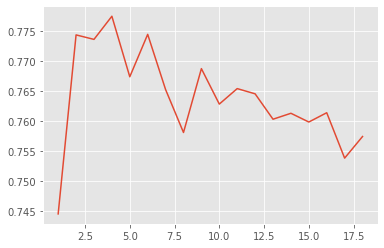

In [24]:
max_features_quality = [RandomForestRegressor(n_estimators=200,random_state=0,oob_score=True,
               n_jobs=-1,max_features=i).fit(X,y).oob_score_ 
               for i in np.arange(1,X.shape[1])]

print(max_features_quality[:6])
plt.plot(np.arange(1,X.shape[1]),max_features_quality)

Plotting the curves for different numbers of variables at each split suggests to use parameter `max_features` equal to 6.    

#### Predicting and calculating RMSE for the random forest model.

In [25]:
def RMSE(x,y): 
    return np.mean((x - y)**2)**0.5
rfSalary200 = RandomForestRegressor(n_estimators=200,random_state=0,
                                    oob_score=True,n_jobs=-1,max_features=6)
rfSalary200.fit(X, y)
print('train RMSE =',RMSE(Hitters.Salary,rfSalary200.predict(X)))

train RMSE = 0.1525854163075992


Note that it is prediction for the train set. Out-of-bag RMSE is more adequate estimate of the model quality.

In [26]:
print('OOB RMSE =',RMSE(Hitters.Salary,rfSalary200.oob_prediction_))

OOB RMSE = 0.4214669108601699


### Gradient Boosting    

Analyze the same data using gradient boosting.     

The method is implemented in [**xgboost**](http://xgboost.readthedocs.io/en/latest/python/python_intro.html).    

XGBoost is short for "Extreme Gradient Boosting".   

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.  

* Speed: it can automatically do parallel computation on Windows and Linux, with OpenMP.    
* The XGBoost python module is able to load data from:
    + libsvm txt format file
    + Numpy 2D array, and
    + xgboost binary buffer file.
* Sparsity: it accepts sparse input for both tree booster and linear booster, and is optimized for sparse input ;
* Customization: it supports customized objective functions and evaluation functions.

Set "objective" parameter.

In [27]:
param = {'objective': 'reg:squarederror'}

`Xgboost` has large number of parameters.     

Some of them are on the list in `params`.     
Commonly used ones are:  

* `objective` objective function, typically:
    + `reg:squarederror` - for linear regression
    + `binary:logistic` - logistic regression for classification
* `eta` step size of each boosting step
* `max.depth` maximum depth of the tree
* `nthread` number of threads used in training, if not set, all threads are used.  

Xgboost works only with numeric data while **Hitters** has several categorical columns. Fortunately we have already converted them to integer.  
The internal **xgboost** data structure is DMatrix. It is optimized for both memory efficiency and training speed. Here is how one can create it.

In [28]:
dtrain = xgb.DMatrix(X, label=y)

Run cross validation to find the best number of iterations.

In [29]:
cvSalary = xgb.cv(param, dtrain, nfold = 3,num_boost_round=60,
                  verbose_eval=10)
cvSalary.iloc[30:]

[0]	train-rmse:3.88853+0.02202	test-rmse:3.88738+0.08022
[10]	train-rmse:0.22799+0.00500	test-rmse:0.50047+0.04332
[20]	train-rmse:0.06305+0.00432	test-rmse:0.46388+0.05836
[30]	train-rmse:0.02589+0.00128	test-rmse:0.46280+0.05798
[40]	train-rmse:0.00933+0.00103	test-rmse:0.46267+0.05711
[50]	train-rmse:0.00315+0.00042	test-rmse:0.46273+0.05705
[59]	train-rmse:0.00132+0.00018	test-rmse:0.46273+0.05709


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
30,0.025887,0.001278,0.462797,0.057978
31,0.023271,0.001306,0.462946,0.058141
32,0.021136,0.001176,0.462765,0.057758
33,0.018148,0.001724,0.462921,0.058091
34,0.016384,0.001400,0.462701,0.057626
35,0.014982,0.001172,0.462537,0.057506
36,0.013061,0.001377,0.462590,0.057404
37,0.011786,0.001595,0.462521,0.057413
38,0.010900,0.001260,0.462659,0.057279
39,0.010240,0.001121,0.462694,0.057198


Note that there is no improvement in *train-rmse-mean* at the end of training process while the algorithm continues building new trees. We should catch this moment and stop training to avoid overfitting.  
Optimal number of iterations is

best number of rounds = 42
rmse = 0.46251


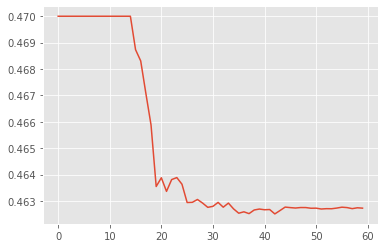

In [30]:
eps = 1e-6
bestNR = np.argmax(cvSalary['test-rmse-mean']<eps+min(cvSalary['test-rmse-mean']))
bestRMSE = cvSalary.loc[bestNR,'test-rmse-mean']
plt.plot(cvSalary['test-rmse-mean'].clip(0,.47))
print('best number of rounds =',bestNR)
print('rmse =',bestRMSE) # using bestNR

Train the model using *bestNR* and calculate its RMSE using entire sample.

In [31]:
modelSalary = xgb.train(param, dtrain,num_boost_round=bestNR)
print(RMSE(y,modelSalary.predict(xgb.DMatrix(X))))

0.017190909698329128


This mean squared error still is too small in comparison with the order of magnitude of test RMSE.   

#### Tuning parameters    

Scikit-Learn has special tool for parameter tunning - [model_selection.GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV).     

The mandatory parameters are 
* estimator : estimator object with scikit-learn estimator interface;
* param_grid : dict or list of dictionaries. Dictionary with parameters names (string) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. This enables searching over any sequence of parameter settings.  
The parameters of the estimator are optimized by cross-validated grid-search over a parameter grid.  

In order to apply *GridSearchCV* to XGBoost parameter tunning we need Scikit-Learn Wrapper interface for XGBoost. Class *XGBRegressor* is implementation of the scikit-learn API for XGBoost regression, *XGBClassifier* - for classification. See [Python API reference](http://xgboost.readthedocs.io/en/latest/python/python_api.html) for more details.  

Repeat the last model fitting and RMSE calculation in terms of *XGBRegressor*. 

In [32]:
regSalary = XGBRegressor(objective='reg:squarederror',n_estimators=bestNR)
regSalary.fit(X,y)
print(RMSE(y,regSalary.predict(X)))

0.017190909698329128


The result is different from the one above. The point is that some parameters in  *XGBRegressor* constructor have default values different from those in *xgb.train* call. Set two additional parameters *max_depth* and *learning_rate* to their *xgb.train* default values.

In [33]:
regSalary = XGBRegressor(objective='reg:squarederror',n_estimators=bestNR,max_depth=6,
                         learning_rate=0.3)
regSalary.fit(X,y)
print(RMSE(y,regSalary.predict(X)))

0.017190909698329128


With new values we reproduced result.  

Proceed to the greed search. Prepare the grid of parameters.

In [34]:
# xgboost task parameters
folds = 3

# Parameters grid to search
param_test1 = {
    'learning_rate':[.3,.15,.05],
    'max_depth':[4,5,6],
    'n_estimators':np.append(range(30,90,10),bestNR)
}

Run grid search.

In [35]:
grid = GridSearchCV(estimator = XGBRegressor(objective= 'reg:squarederror',
                    nthread=1, seed=0), scoring = 'neg_mean_squared_error',
                    param_grid = param_test1, n_jobs=-1,cv=folds)
grid.fit(X, y)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...hread=1,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                         

The results are stored in the attribute *cv_results_*.

In [36]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [37]:
# summarize results
for mean,param in zip(grid.cv_results_['mean_test_score'],grid.cv_results_['params']):
    print("%f with: " % -mean,param)

0.233761 with:  {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 30}
0.234438 with:  {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 40}
0.235926 with:  {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 50}
0.236492 with:  {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 60}
0.236515 with:  {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 70}
0.236556 with:  {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 80}
0.234384 with:  {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 42}
0.226786 with:  {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 30}
0.226007 with:  {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 40}
0.226256 with:  {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 50}
0.226358 with:  {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 60}
0.226338 with:  {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 70}
0.226433 with:  {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 80}
0.226276 with:  {'learnin

Show optimal set of parameters and compare MSE with the results before tunning, stored in *bestRMSE*.

In [38]:
print('MSE before tunning: %f' % bestRMSE**2)
print("Best MSE after tunning: %f using %s" % (-grid.best_score_,grid.best_params_))

MSE before tunning: 0.213916
Best MSE after tunning: 0.212968 using {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 40}


Visible improvement. 

## Example: Large Number of Predictors

Consider the example analyzed in the workshop Linear Regression with Large Number of Predictors. Simulate data

In [39]:
N = 500
np.random.seed(0)
Epsilon = np.random.normal(size=N)
X = pd.DataFrame(np.random.normal(0, 2, size=(N,N))).add_prefix('X')
slopesSet = np.random.uniform(1,3,N)
Y = [1 + X.iloc[:,:z] @ slopesSet[:z] + Epsilon for z in np.arange(1,N)]
X.head(5)
m = 440
X,y = X.iloc[:,:m],Y[m-1]

### Random forest

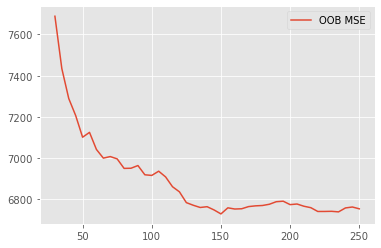

In [40]:
# set warm_start=True to reuse the solution of the previous call to fit
rfManyReg = RandomForestRegressor(warm_start=True,random_state=0,oob_score=True,
                                 n_jobs=-1)
min_estimators = 30
max_estimators = 250
step = 5
est_range = np.arange(min_estimators, max_estimators + 1,step)
error_rate = np.zeros((max_estimators-min_estimators)//step+1)

for i in est_range:
    rfManyReg.set_params(n_estimators=i)
    rfManyReg.fit(X, y)
    error_rate[(i-min_estimators)//step] = RMSE(y,rfManyReg.oob_prediction_)**2   
        
plt.plot(est_range,error_rate)
plt.legend(['OOB MSE'])

Seems like 150 trees is quite enough for the model. In the previous lectures we got 10 fold cross validation MSE for linear model about 45 and for regression tree it was above 13000. Calculate the score for random forest.

In [41]:
rf150 = RandomForestRegressor(random_state=0,n_estimators=150,n_jobs=-1)
print ('Random Forest Regressor model CV MSE = ',
       -np.mean(cross_val_score(rf150, X, y,scoring='neg_mean_squared_error',cv=10)))

Random Forest Regressor model CV MSE =  6893.088154055944


Significant improvement compare to regression tree but far behind the linear model.

#### Importance of predictors

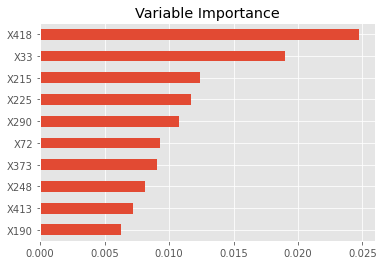

In [42]:
imp = pd.DataFrame({'importance':rfManyReg.feature_importances_,'slope':slopesSet[:m]},
                   index=list(X)).sort_values('importance')
imp[-10:].importance.plot(kind = 'barh')
_ = plt.title('Variable Importance')

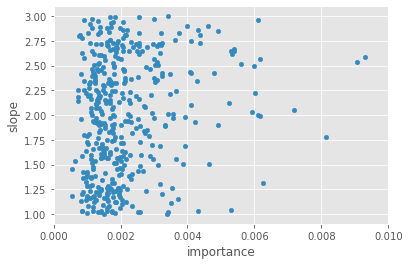

In [43]:
imp.plot(x='importance',y='slope',kind='scatter')
_ = plt.xlim(0,0.01) 

In [44]:
np.column_stack((np.argsort(imp.importance),np.argsort(imp.slope)))[-6:]

array([[434,  61],
       [435, 362],
       [436, 192],
       [437, 334],
       [438, 240],
       [439, 383]])

Recall that all parameters are simulated as significant and all predictors are independent by construction.     
The larger the coefficient - the more significant should be the predictor.     
Random tree may not be assigning importance correctly in this case.    

### Gradient boosting

[0]	train-rmse:79.66091+1.21139	test-rmse:85.04131+5.65031
[30]	train-rmse:15.97450+0.64425	test-rmse:83.32256+5.58243
[60]	train-rmse:3.96596+0.19723	test-rmse:82.22857+5.64256
[90]	train-rmse:1.14471+0.06450	test-rmse:82.12544+5.61033
[120]	train-rmse:0.36028+0.04411	test-rmse:82.06293+5.61384
[150]	train-rmse:0.12045+0.01786	test-rmse:82.05734+5.61272
[180]	train-rmse:0.04319+0.00874	test-rmse:82.05688+5.61281
[210]	train-rmse:0.01591+0.00380	test-rmse:82.05488+5.61303
[240]	train-rmse:0.00542+0.00117	test-rmse:82.05439+5.61287
[270]	train-rmse:0.00201+0.00050	test-rmse:82.05429+5.61281
[299]	train-rmse:0.00079+0.00020	test-rmse:82.05428+5.61277
best number of rounds = 129
XGBoost MSE = 6732.866071110701


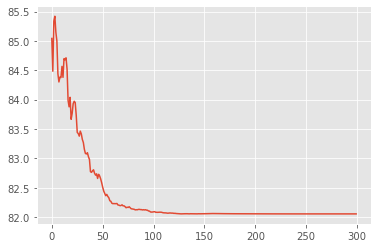

In [45]:
param = {'objective': 'reg:squarederror', 'max_depth' : 3}
dtrain = xgb.DMatrix(X, label=y)
gbManyReg = xgb.cv(param, dtrain, nfold = 5,num_boost_round=300,verbose_eval=30)

eps = 1e-6
bestNR = np.argmax(gbManyReg['test-rmse-mean']<eps+min(gbManyReg['test-rmse-mean']))
bestRMSE = gbManyReg.loc[bestNR,'test-rmse-mean']
plt.plot(gbManyReg['test-rmse-mean'])
print('best number of rounds =',bestNR)
print('XGBoost MSE =',bestRMSE**2) #using bestNR

We see that even advanced tree models can not treat complicated linear model when linear model is able to fit the data.   

**General Conclusion**. Linear model may not be the best choice in all cases. But if it works - it works better than other models.    
Same is true in general about any parametric model in comparison with non-parametric approaches.

# Classification

## Otto Product Classification Example

In this example we use data set provided by **Otto Group** for **Kaggle** competition [Otto Group Product Classification Challenge](https://www.kaggle.com/c/otto-group-product-classification-challenge).      

Otto Group needed categorizing about 200,000 unspecified products into 9 classes based on 93 unspecified features. For simplicity we reduced the number of visitors and the number of classes.     

Load the data set.

In [46]:
Data = pd.read_csv('DTTrain.csv')
Data.shape # dataset dimensions
# data content
Data.head()

,time,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,45652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Class_5
1,225646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Class_3
2,345735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,Class_5
3,436478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Class_5
4,478129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Class_5


Encode labels of target column and partition data into train (2/3) and test (1/3) sets.

In [47]:
X = Data.drop(['time','target'],axis=1)
y = LabelEncoder().fit_transform(Data.target)
xTrain, xTest, yTrain, yTest = train_test_split(X, y,test_size=1/3, random_state=0)

### Random forest    

Fit random forest to the train data and make prediction on the test data.

In [48]:
rfOtto = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
rfOtto.fit(xTrain,yTrain)
rfPred = rfOtto.predict_proba(xTest,)
rfPred[1:5]

array([[0.04, 0.16, 0.03, 0.69, 0.08],
       [0.06, 0.66, 0.  , 0.04, 0.24],
       [0.04, 0.8 , 0.03, 0.07, 0.06],
       [0.  , 0.98, 0.  , 0.02, 0.  ]])

Use Multiclass logloss for estimating prediction quality. Calculate it for random forest.

In [49]:
rfLogLoss = log_loss(yTest, rfPred)
print('Random forest logloss',rfLogLoss)

Random forest logloss 0.3944973844089365


### Gradient boosting    

Set parameters and create *DMatrix* from train set.

In [50]:
param = {"objective" : "multi:softprob","eval_metric" : "mlogloss",
         "num_class" : max(y) + 1 }
dtrain = xgb.DMatrix(xTrain, yTrain)

The choice of `"objective" = "multi:softprob"` represents generalization of logistic link into multiple classes and returns a matrix of class probabilities, as opposed to `"objective" = "multi:softmax"` which returns the class of maximum probability.   

Run 3-fold cross validation.

In [51]:
cv_nround = 10
cv_nfold = 3
bst_cv = xgb.cv(param, dtrain, nfold = cv_nfold, num_boost_round=cv_nround,
               verbose_eval=1, show_stdv=False)

[0]	train-mlogloss:1.16171	test-mlogloss:1.18919
[1]	train-mlogloss:0.92361	test-mlogloss:0.96727
[2]	train-mlogloss:0.76343	test-mlogloss:0.82037
[3]	train-mlogloss:0.64553	test-mlogloss:0.71391
[4]	train-mlogloss:0.55661	test-mlogloss:0.63497
[5]	train-mlogloss:0.48713	test-mlogloss:0.57471
[6]	train-mlogloss:0.43178	test-mlogloss:0.52709
[7]	train-mlogloss:0.38724	test-mlogloss:0.48910
[8]	train-mlogloss:0.35004	test-mlogloss:0.45961
[9]	train-mlogloss:0.31938	test-mlogloss:0.43560


Since *test-mlogloss* continues decreasing in the process of cross validation we know that the model is not over-fitting.    
But this also may mean that the fit can be better.     
Make prediction with this number of rounds.

In [52]:
bst = xgb.train(param, dtrain,num_boost_round=cv_nround)
xgbPred = bst.predict(xgb.DMatrix(xTest))
xgbPred[:6]

array([[0.16967867, 0.04487576, 0.05460636, 0.03671249, 0.6941268 ],
       [0.03951951, 0.08995124, 0.01087384, 0.8404624 , 0.01919306],
       [0.05057852, 0.7855911 , 0.02884467, 0.04046924, 0.0945164 ],
       [0.03765826, 0.7789637 , 0.04230748, 0.04383379, 0.09723675],
       [0.02068921, 0.90096563, 0.01754955, 0.03620085, 0.0245948 ],
       [0.0148361 , 0.01472895, 0.9335279 , 0.02023944, 0.0166676 ]],
      dtype=float32)

Compare prediction quality of random forest and gradient boosting

In [53]:
print('Random forest logloss',rfLogLoss)
print('XGBoost logloss',log_loss(yTest, xgbPred))

Random forest logloss 0.3944973844089365
XGBoost logloss 0.42086776643576457


**Try to play with `xgboost` parameters (num_boost_round, learning_rate (eta), max_depth etc.) in order to improve its forecast.**    
**Can it do better than random forest on these data?**

<span style="color:red">(Skipped Code)</span>

In [54]:
cv_nround = 20
bst_cv = xgb.cv(param, dtrain, nfold = cv_nfold, num_boost_round=cv_nround,
               verbose_eval=1, show_stdv=False)
bst = xgb.train(param, dtrain,num_boost_round=cv_nround)
xgbPred = bst.predict(xgb.DMatrix(xTest))

[0]	train-mlogloss:1.16171	test-mlogloss:1.18919
[1]	train-mlogloss:0.92361	test-mlogloss:0.96727
[2]	train-mlogloss:0.76343	test-mlogloss:0.82037
[3]	train-mlogloss:0.64553	test-mlogloss:0.71391
[4]	train-mlogloss:0.55661	test-mlogloss:0.63497
[5]	train-mlogloss:0.48713	test-mlogloss:0.57471
[6]	train-mlogloss:0.43178	test-mlogloss:0.52709
[7]	train-mlogloss:0.38724	test-mlogloss:0.48910
[8]	train-mlogloss:0.35004	test-mlogloss:0.45961
[9]	train-mlogloss:0.31938	test-mlogloss:0.43560
[10]	train-mlogloss:0.29544	test-mlogloss:0.41595
[11]	train-mlogloss:0.27257	test-mlogloss:0.39995
[12]	train-mlogloss:0.25386	test-mlogloss:0.38599
[13]	train-mlogloss:0.23777	test-mlogloss:0.37494
[14]	train-mlogloss:0.22328	test-mlogloss:0.36595
[15]	train-mlogloss:0.21177	test-mlogloss:0.35777
[16]	train-mlogloss:0.20191	test-mlogloss:0.35054
[17]	train-mlogloss:0.19215	test-mlogloss:0.34560
[18]	train-mlogloss:0.18286	test-mlogloss:0.34053
[19]	train-mlogloss:0.17623	test-mlogloss:0.33637


In [55]:
print('Random forest logloss',rfLogLoss)
print('XGBoost logloss',log_loss(yTest, xgbPred))

Random forest logloss 0.3944973844089365
XGBoost logloss 0.32150398411443204


In [56]:
# xgboost task parameters
folds = 3

# Parameters grid to search
param_grid = {
    'max_depth':[3,4,5],
    'n_estimators':np.arange(20,55,5)}


grid = GridSearchCV(estimator = XGBClassifier(objective='multi:softprob',seed=0),
                    scoring = 'neg_log_loss',param_grid = param_grid,
                    cv=folds,verbose=2,n_jobs=-1)
grid.fit(xTrain, yTrain)

# summarize results
for mean,param in zip(grid.cv_results_['mean_test_score'],grid.cv_results_['params']):
    print("%f with: " % -mean,param)

# Show best logloss and parameters
print("Best logloss after tunning: %f using %s" % (-grid.best_score_,
                                               grid.best_params_))
param = {"objective" : "multi:softprob","eval_metric" : "mlogloss",
         "num_class" : max(y) + 1, 'max_depth':grid.best_params_['max_depth']}
bst = xgb.train(param, dtrain,num_boost_round=grid.best_params_['n_estimators'])
xgbPred = bst.predict(xgb.DMatrix(xTest))
print('XGBoost test logloss after tunning',log_loss(yTest,xgbPred))

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:  1.9min finished
/home/yuri/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:06:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.412489 with:  {'max_depth': 3, 'n_estimators': 20}
0.384749 with:  {'max_depth': 3, 'n_estimators': 25}
0.365795 with:  {'max_depth': 3, 'n_estimators': 30}
0.351048 with:  {'max_depth': 3, 'n_estimators': 35}
0.340501 with:  {'max_depth': 3, 'n_estimators': 40}
0.332653 with:  {'max_depth': 3, 'n_estimators': 45}
0.326379 with:  {'max_depth': 3, 'n_estimators': 50}
0.372541 with:  {'max_depth': 4, 'n_estimators': 20}
0.349427 with:  {'max_depth': 4, 'n_estimators': 25}
0.334608 with:  {'max_depth': 4, 'n_estimators': 30}
0.324075 with:  {'max_depth': 4, 'n_estimators': 35}
0.316172 with:  {'max_depth': 4, 'n_estimators': 40}
0.311081 with:  {'max_depth': 4, 'n_es

## Identification of Spoken Letters (ISOLET) Example    

Data for this example are from UCI repository: Lichman, M. (2013), [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science.    

The data set is [ISOLET (Isolated Letter Speech Recognition)](http://archive.ics.uci.edu/ml/machine-learning-databases/isolet/).

The version of the data with modified format used in the example was created at [Win-Vector LLC](http://www.win-vector.com/site/) and the example is covered in their [video course](https://www.youtube.com/watch?v=WZvPUGNJg18). The materials for their lecture including the data are  [here](http://winvector.github.io/IntroductionToDataScience/Sec02_Lesson013_GBM/).  

Data Set Information:

This data set was generated as follows. 150 subjects spoke the name of each letter of the alphabet twice. Hence, we have 52 training examples from each speaker.    
The data contain different characteristics of the sounds, for example characteristics of  [waveforms](http://www.bespokenart.com/names/see_your_name.html).   
The features include spectral coefficients; contour features, sonorant features, pre-sonorant features, and post-sonorant features.     
Exact order of appearance of the features is not known.

The speakers are grouped into sets of 30 speakers each, and are referred to as isolet1, isolet2, isolet3, isolet4, and isolet5.    
The data appear in ["isolet1+2+3+4.data"](http://winvector.github.io/IntroductionToDataScience/Sec02_Lesson012_SVM/isolet1+2+3+4.data.gz)  in sequential order: first the speakers from isolet1, then isolet2, and so on.     
The test set, ["isolet5"](http://winvector.github.io/IntroductionToDataScience/Sec02_Lesson012_SVM/isolet5.data.gz), is a separate file. 

The total number of observations in ISOLET should be $150 \times 26 \times 2 = 7800$. Of them 6238 are in the training set and 1559 are in the test set. Three observations are missing for some reason. 

Attribute Information:

The features are described in the paper by Cole and Fanty:     

Fanty, M., Cole, R. (1991). Spoken letter recognition. In Lippman, R. P., Moody, J., and Touretzky, D. S. (Eds). Advances in Neural Information Processing Systems 3. San Mateo, CA: Morgan Kaufmann

See also:    

[Dietterich, T. G., Bakiri, G. (1991) Error-correcting output codes: A general method for improving multiclass inductive learning programs. Proceedings of the Ninth National Conference on Artificial Intelligence (AAAI-91), Anaheim, CA: AAAI Press](https://www.aaai.org/Papers/AAAI/1991/AAAI91-089.pdf). 

[Dietterich, T. G., Bakiri, G. (1994) Solving Multiclass Learning Problems via Error-Correcting Output Codes](https://www.jair.org/media/105/live-105-1426-jair.pdf).  

[Fanty, M., Cole, R. (1991). Spoken letter recognition. In Lippman, R. P., Moody, J., and Touretzky, D. S. (Eds). Advances in Neural Information Processing Systems 3. San Mateo, CA: Morgan Kaufmann](http://papers.nips.cc/paper/295-spoken-letter-recognition.pdf).

Creators of the data:    

Ron Cole and Mark Fanty:    
Department of Computer Science and Engineering, 
Oregon Graduate Institute, Beaverton, OR 97006. 
cole '@' cse.ogi.edu, fanty '@' cse.ogi.edu
cited above. 

Donor: 

Tom Dietterich 
Department of Computer Science 
Oregon State University, Corvallis, OR 97331 
tgd '@' cs.orst.edu

### Light Gradient Boosting Machine (LightGBM)

We use **LightGBM** package for analysis of this data.

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

* Faster training speed and higher efficiency
* Lower memory usage
* Better accuracy
* Parallel and GPU learning supported
* Capable of handling large-scale data
For more details, please refer to [Features](https://github.com/Microsoft/LightGBM/blob/master/docs/Features.rst).

**LightGBM** uses the histogram based algorithms, which bucketing continuous feature(attribute) values into discrete bins, to speed up training procedure and reduce memory usage.  

The Python interface of the package is similar to the one of **XGBoost**. Scikit-Learn Wrapper interface for **LightGBM** is also implemented in the classes *LGBMRegressor* and *LGBMClassifier*.

Read train data.

In [57]:
# Actual example
# isolet data from 'https://archive.ics.uci.edu/ml/datasets/ISOLET'
dTrain = pd.read_csv('isolet1234.data.gz',header=None,prefix='V')
dTrain['isTest'] = False # add column, identifying test
print(dTrain.shape)
dTrain.head()

(6238, 619)


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V609,V610,V611,V612,V613,V614,V615,V616,V617,isTest
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,...,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872,1.0,False
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,...,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910,1.0,False
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,...,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762,2.0,False
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,...,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510,2.0,False
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,...,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500,3.0,False


Read test data.

In [58]:
dTest = pd.read_csv('isolet5.data.gz',header=None,prefix='V')
dTest['isTest'] = True # add column, identifying test
print(dTest.shape)
dTest.head()

(1559, 619)


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V609,V610,V611,V612,V613,V614,V615,V616,V617,isTest
0,-0.2080,0.3480,0.3280,0.5040,0.9320,1.0000,0.8360,0.6680,0.2720,0.2400,...,-0.0624,0.2188,0.4532,0.1094,0.1718,0.1562,0.0468,-0.3750,1.0,True
1,-0.2864,0.1992,0.2822,0.4398,0.7012,0.7800,1.0000,0.9792,0.5850,0.4066,...,-0.1472,-0.1782,0.0078,0.1162,-0.0542,-0.0542,-0.0388,-0.7984,1.0,True
2,-0.2348,0.3826,0.6142,0.7492,0.0546,-0.4020,-0.3504,-0.2990,-0.6848,-0.6528,...,0.1500,0.0834,-0.2000,-0.1834,0.0500,-0.0166,-0.1834,-0.8666,2.0,True
3,-0.1856,0.3592,0.7126,0.7366,0.3414,0.1018,-0.1556,-0.2514,-0.2514,-0.3892,...,0.5556,0.4568,0.4568,0.4568,0.2098,0.0370,-0.0618,-0.3334,2.0,True
4,-0.1814,0.4404,0.8394,1.0000,0.7564,0.1866,0.0260,-0.0726,-0.2124,-0.3730,...,-0.1688,0.2728,0.2988,0.2468,0.1948,-0.0130,-0.2988,-0.7662,3.0,True


Concatenate train and test to one data frame. Rename column 'V617' to 'target'.

In [59]:
d = dTrain.append(dTest).rename({'V617':'target'}, axis='columns')
d.shape

(7797, 619)

Convert target column letter numbers to letters.    
Select only rows with letters "m" and "n".   
Turn the column in to a logical variable: "n" corresponding to `TRUE`.

In [60]:
d['target'] = d.target.apply(lambda x: string.ascii_lowercase[int(x)-1])
d = d[(d.target=='m') | (d.target=='n')]
print(d.shape)
yColumn = 'isLetter'
d[yColumn] = d.target == 'n'
d[[yColumn]].head()

(599, 619)


,isLetter
24,False
25,False
26,True
27,True
76,False


Run cross validation to find optimal number of rounds using *lightgbm.cv*. 

Cross validation


/home/yuri/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/lightgbm/engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	cv_agg's binary_logloss: 0.352324 + 0.0303723
[20]	cv_agg's binary_logloss: 0.245763 + 0.0442494
[30]	cv_agg's binary_logloss: 0.193716 + 0.0425821
[40]	cv_agg's binary_logloss: 0.1746 + 0.0499421
[50]	cv_agg's binary_logloss: 0.165205 + 0.0513047
[60]	cv_agg's binary_logloss: 0.157633 + 0.052158
[70]	cv_agg's binary_logloss: 0.160817 + 0.0575959
[80]	cv_agg's binary_logloss: 0.161981 + 0.06119
[90]	cv_agg's binary_logloss: 0.167058 + 0.0638135
[100]	cv_agg's binary_logloss: 0.170807 + 0.0672116
[110]	cv_agg's binary_logloss: 0.177249 + 0.0682078
[120]	cv_agg's binary_logloss: 0.183542 + 0.0698706


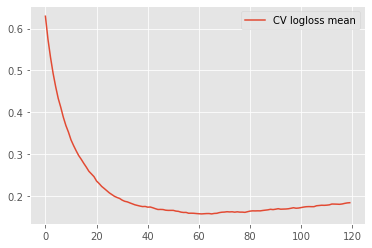

In [61]:
lgb_param = {'objective': 'binary',
             'metric': ['binary_logloss'],
             'verbose':-1
             }
lgb_train = lgb.Dataset(d[~d.isTest].drop(['isTest','isLetter','target'],axis=1), 
                        label=d.isLetter[~d.isTest].astype(int))
print("Cross validation")
long_hist = lgb.cv(lgb_param, lgb_train, num_boost_round=120,
                   verbose_eval=10) #early_stopping_rounds=3,
plt.plot(long_hist['binary_logloss-mean'])
plt.legend(['CV logloss mean'])

Returned object *hist* is a dictionary with mean and standard deviatioon of selected metric.

In [62]:
long_hist.keys()

dict_keys(['binary_logloss-mean', 'binary_logloss-stdv'])

The plot shows the model overfitting in the right part of the curve. We could find the optimal number of rounds minimizing *long_hist['binary_logloss-mean']*, but the better way is using parameter *early_stopping_rounds* which activates early stopping. If CV metric is not improved during *early_stopping_rounds* rounds the learning terminates. Last entry in returned evaluation history is the one from best iteration.

In [63]:
hist = lgb.cv(lgb_param,lgb_train, num_boost_round=120, 
              early_stopping_rounds=3)
n_rounds = len(hist['binary_logloss-mean'])
print('best number of rounds =',n_rounds)

/home/yuri/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/lightgbm/engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


best number of rounds = 62


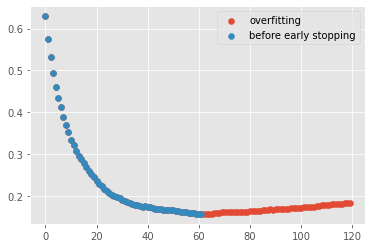

In [64]:
l_h = long_hist['binary_logloss-mean']
plt.scatter(range(len(l_h)),l_h)
plt.scatter(range(n_rounds),hist['binary_logloss-mean'])
plt.legend(['overfitting','before early stopping'])

Now we can train the model with optimal number of rounds and make prediction.

In [65]:
lgb_bst = lgb.train(lgb_param, lgb_train, n_rounds)
lgbPred = lgb_bst.predict(d[d.isTest].drop(['isTest','isLetter','target'],axis=1))
lgbPred[:10]

array([0.00151832, 0.05034628, 0.98387217, 0.97268045, 0.00207903,
       0.00550659, 0.84014081, 0.70322169, 0.00205804, 0.00354411])

*Predict* method return numpy array of prediction probabilities. Calculate logloss.

In [66]:
log_loss(d.isLetter[d.isTest],lgbPred)

0.21387963946580843

Visualize prediction.

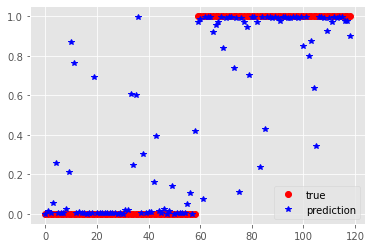

In [67]:
res = pd.DataFrame({'true':d.isLetter[d.isTest].astype(int),'prediction':lgbPred})
res = res.sort_values('true').reset_index(drop=True)
plt.plot(res.true,'ro') # plot using red circle markers
plt.plot(res.prediction,'b*') # plot using blue star markers
plt.legend(['true','prediction'])

Method *feature_importance* returns array of feature importances.

In [68]:
imp = lgb_bst.feature_importance()
imp.shape

(617,)

It can be visualized either as XGBoost features in the example above or with the method *plot_importance*.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

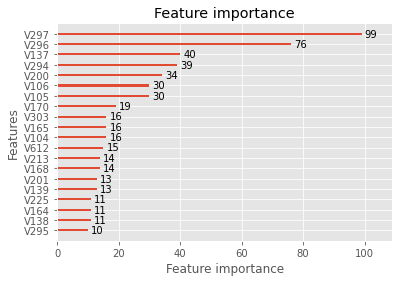

In [69]:
lgb.plot_importance(lgb_bst,max_num_features=20)